In [129]:
import networkx as nx
import pandas as pd

# Load the .graphml file
file_path = "G_3.graphml"  # Update with the correct path if needed
G = nx.read_graphml(file_path)
len(G.edges)



3247

### Get sex degree of gays



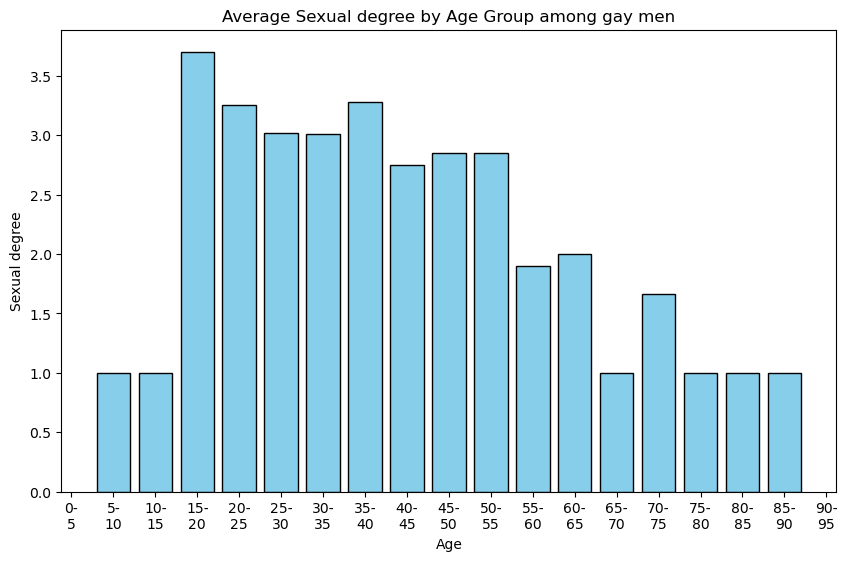

In [71]:
k = []
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    if gay== 1:
        age=node_attributes.get("Age", None)
        if age !=" ":
            degree=G.degree(node_id)
            k.append([age,degree])  # Append the "Race" value to the list

# Convert to DataFrame
import matplotlib.pyplot as plt
# Convert to DataFrame
df = pd.DataFrame(k, columns=['Age', 'Value'])

# Ensure 'Age' is treated as numeric (even if initially it's a string)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check if the 'Value' column is numeric and coerce if necessary
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Now group by 'Age' and calculate the average of 'Value'
# Define the age intervals
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-\n5', '5-\n10', '10-\n15', '15-\n20', '20-\n25', '25-\n30', '30-\n35', '35-\n40', '40-\n45', '45-\n50', 
          '50-\n55', '55-\n60', '60-\n65', '65-\n70', '70-\n75', '75-\n80', '80-\n85', '85-\n90', '90-\n95', '95-\n100']

# Create a new column with the corresponding age group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average 'Value' for each age group
avg_per_age_group = df.groupby('Age_Group')['Value'].mean()


plt.figure(figsize=(10, 6))
plt.bar(avg_per_age_group.index, avg_per_age_group.values, color='skyblue', edgecolor='black')
# Add title and labels
plt.title('Average Sexual degree by Age Group among gay men')
plt.xlabel('Age')
plt.ylabel('Sexual degree')

# Show the plot
plt.show()

## hiv dist of gays

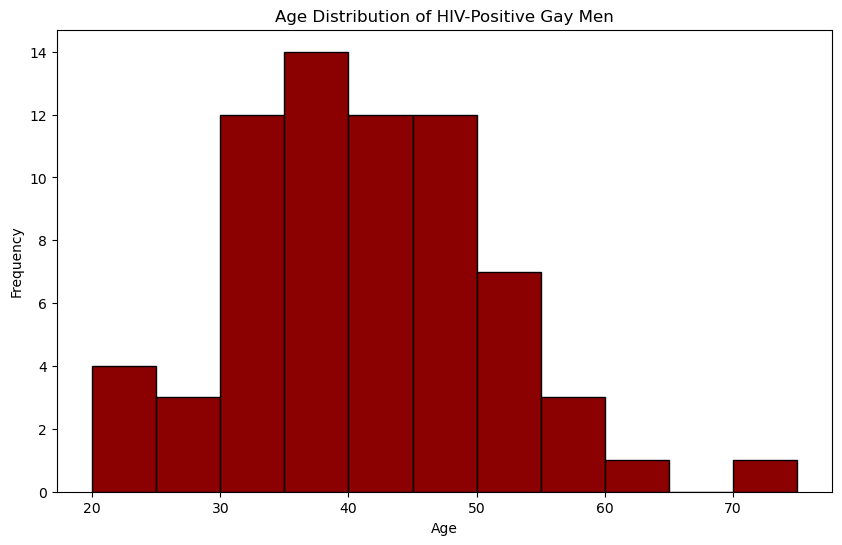

In [162]:
k = []
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    HIV_S=node_attributes.get("HIV_status", None) 
    if gay== 1 and HIV_S=="Positive":
        age=node_attributes.get("Age", None)
        if type(age)!=int:
            k.append(int(age))  # Append the "Race" value to the list

k = sorted(k)

# Plot the histogram with bin size 5
plt.figure(figsize=(10, 6))
plt.hist(k, bins=range(min(k), max(k) + 5, 5), color='darkred', edgecolor='black')

# Add title and labels
plt.title('Age Distribution of HIV-Positive Gay Men')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

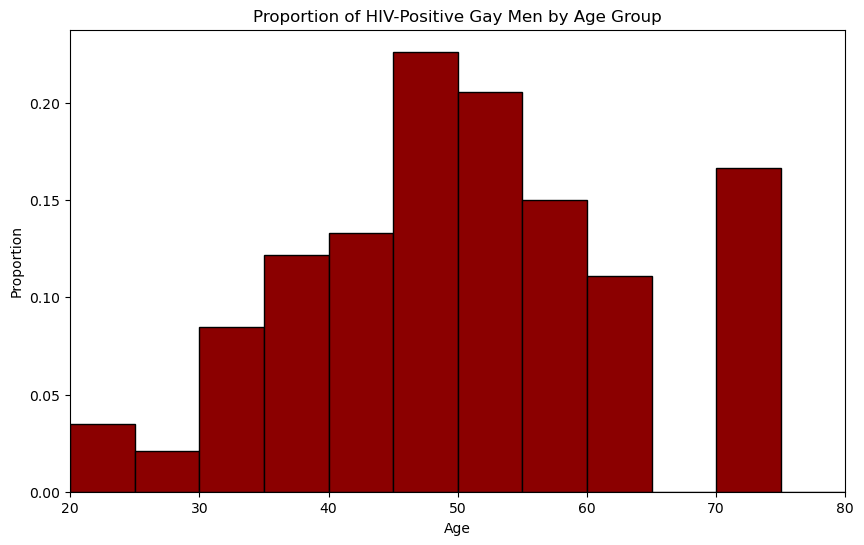

In [171]:
import matplotlib.pyplot as plt
from collections import Counter

k = []
allages = []

# Collect the data
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Gay" attribute
    HIV_S = node_attributes.get("HIV_status", None)  # HIV status
    age = node_attributes.get("Age", None)  # Age attribute
    
    if gay == 1 and type(age) != int:
        allages.append(int(age))  # Append all ages of gay people
        if HIV_S == "Positive":
            k.append(int(age))  # Append age of HIV-positive gay individuals

# Define bin size (5 years) and the bin range based on the data
bin_size = 5
bins = range(min(allages) // bin_size * bin_size, max(allages) + bin_size, bin_size)

# Count the frequency of each age group for all gay individuals and HIV-positive gay individuals
age_counts_all = Counter((age // bin_size) * bin_size for age in allages)
age_counts_hiv = Counter((age // bin_size) * bin_size for age in k)

# Normalize by dividing the HIV count by the total count for each bin
normalized_hiv = {}
for age_bin in age_counts_all:
    hiv_count = age_counts_hiv.get(age_bin, 0)
    total_count = age_counts_all[age_bin]
    normalized_hiv[age_bin] = hiv_count / total_count if total_count > 0 else 0

# Create a list of normalized values for plotting
normalized_values = [normalized_hiv.get(bin, 0) for bin in bins[:-1]]

# Plot the normalized histogram
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], normalized_values, width=bin_size, color='darkred', edgecolor='black', align='edge')

# Add title and labels
plt.title('Proportion of HIV-Positive Gay Men by Age Group')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xlim(20, 80)
# Show the plot
plt.show()


### pie charts of HIV according to certain groups

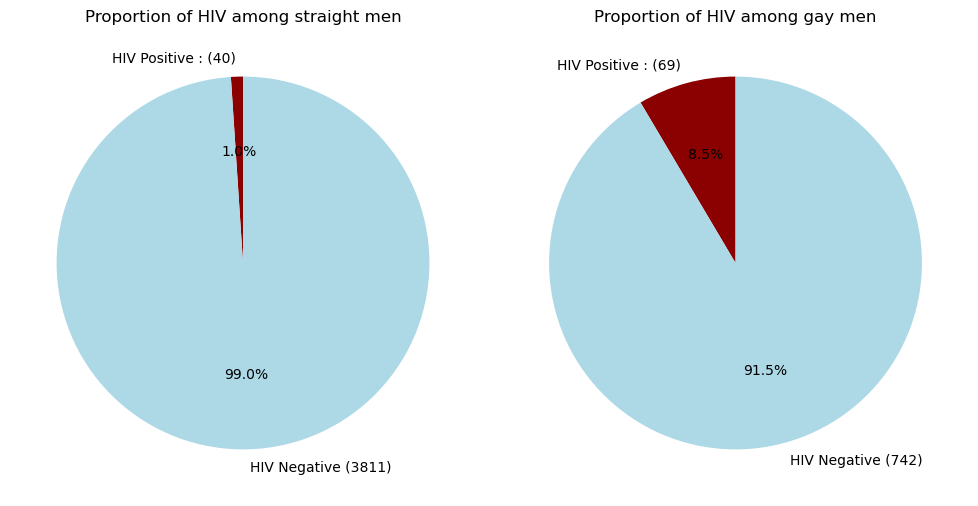

In [70]:
straight= []
straighthiv=[]
gay=[]
gayhiv=[]
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    if node_attributes.get("Sex", None)=="Male":
        Gay_bool = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
        HIV=node_attributes.get("HIV_status", None)
        if Gay_bool== 1:
            gay.append(node_id)
            if HIV== 'Positive':
                gayhiv.append(node_id)
        if Gay_bool== 0:
            straight.append(node_id)
            if HIV== 'Positive':
                straighthiv.append(node_id)

# Data for Pie Chart 1
labels1 =   ['HIV Positive : ('+ str(len(straighthiv)) + ")", 'HIV Negative ('+ str(len(straight)-len(straighthiv)) + ")"]
sizes1 = [len(straighthiv)/len(straight),1-len(straighthiv)/len(straight)]

# Data for Pie Chart 2
labels2 =  ['HIV Positive : ('+ str(len(gayhiv)) + ")", 'HIV Negative ('+ str(len(gay)-len(gayhiv)) + ")"]
sizes2 = [len(gayhiv)/len(gay),1-len(gayhiv)/len(gay)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot Pie Chart 1
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90,colors=['darkred', 'lightblue'])
ax1.set_title('Proportion of HIV among straight men')

# Plot Pie Chart 2
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90,colors=['darkred', 'lightblue'])
ax2.set_title('Proportion of HIV among gay men')

# Display the plots
plt.tight_layout()
plt.show()



### Bar chart for Hiv among genders

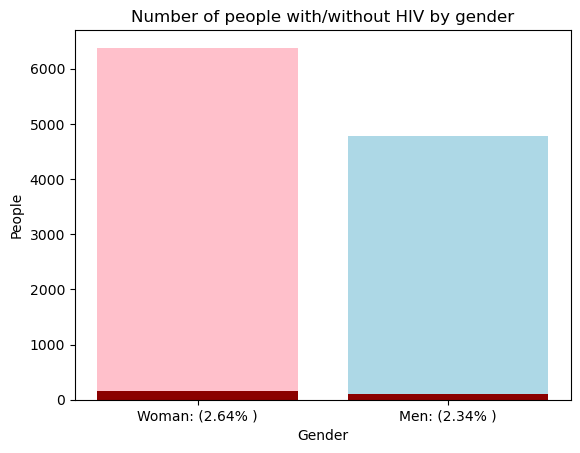

In [93]:
W_count=0
M_count=0
WHIV_count=0
MHIV_count=0


for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    if node_attributes.get("Sex", None)=="Male":
        M_count+=1
        HIV=node_attributes.get("HIV_status", None)
        if HIV=="Positive":
            MHIV_count+=1
    if node_attributes.get("Sex", None)=="Female":
        W_count+=1
        HIV=node_attributes.get("HIV_status", None)
        if HIV=="Positive":
            WHIV_count+=1
        

# Data for the bars
categories = ['Woman: (' + str(round(100*(WHIV_count/W_count),2))+"% )", 'Men: (' + str(round(100*(MHIV_count/M_count),2))+"% )"]
values_1 = [WHIV_count, MHIV_count]  # First part of the stacked bars
values_2 = [W_count, M_count]  # Second part of the stacked bars

# Create a stacked bar chart
plt.bar(categories, values_1, label='Bar 1',color=['darkred', 'darkred'])
plt.bar(categories, values_2, bottom=values_1, label='Bar 2',color=['pink', 'lightblue'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('People')
plt.title('Number of people with/without HIV by gender')

# Add a legend
#plt.legend()

# Show the chart
plt.show()


In [72]:
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    print(node_attributes)
    break

{'HIV_status': 'Positive', 'Race': 'Black', 'Sex': 'Male', 'Age': '45', 'Education level': 'ID', 'Profession': 'missing (out of design)', 'Gay': 1}


### Degree for sex on age with gay and straights

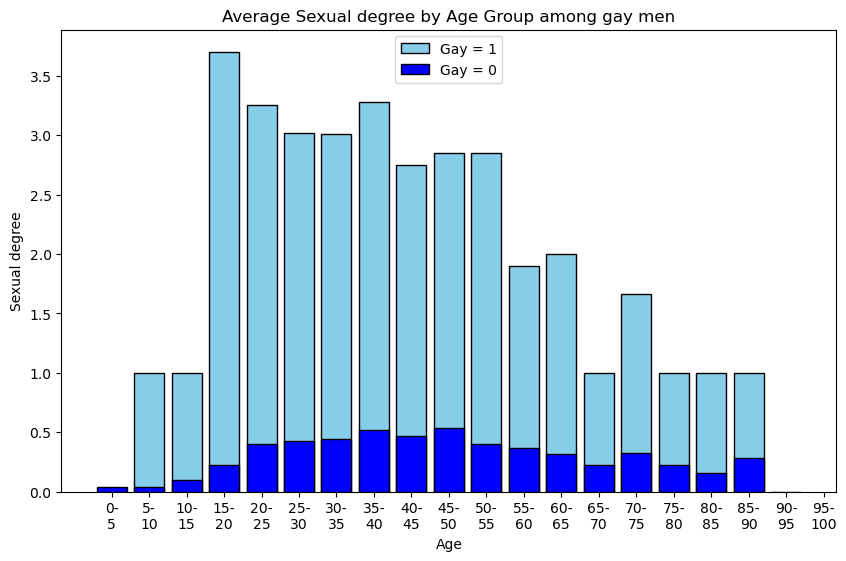

In [124]:

k = []
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    if gay== 1:
        age=node_attributes.get("Age", None)
        if age !=" ":
            degree=G.degree(node_id)
            k.append([age,degree])  # Append the "Race" value to the list

ks=[]
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    if gay== 0:
        age=node_attributes.get("Age", None)
        degree=G.degree(node_id)
        if age !=" " and degree!=-1:
            ks.append([age,degree])  # Append the "Race" value to the list



# Convert to DataFrame
import matplotlib.pyplot as plt
# Convert to DataFrame
df = pd.DataFrame(k, columns=['Age', 'Value'])
dfs = pd.DataFrame(ks, columns=['Age', 'Value'])


# Ensure 'Age' is treated as numeric (even if initially it's a string)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
dfs['Age'] = pd.to_numeric(dfs['Age'], errors='coerce')
# Check if the 'Value' column is numeric and coerce if necessary
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
dfs['Value'] = pd.to_numeric(dfs['Value'], errors='coerce')

# Now group by 'Age' and calculate the average of 'Value'
# Define the age intervals
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-\n5', '5-\n10', '10-\n15', '15-\n20', '20-\n25', '25-\n30', '30-\n35', '35-\n40', '40-\n45', '45-\n50', 
          '50-\n55', '55-\n60', '60-\n65', '65-\n70', '70-\n75', '75-\n80', '80-\n85', '85-\n90', '90-\n95', '95-\n100']

# Create a new column with the corresponding age group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
dfs['Age_Group'] = pd.cut(dfs['Age'], bins=bins, labels=labels, right=False)

# Calculate the average 'Value' for each age group
avg_per_age_group = df.groupby('Age_Group')['Value'].mean()
avg_per_age_groups = dfs.groupby('Age_Group')['Value'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_per_age_group.index, avg_per_age_group.values, color='skyblue', edgecolor='black', label='Gay = 1')
plt.bar(avg_per_age_groups.index, avg_per_age_groups.values, color='blue', edgecolor='black', label='Gay = 0')
# Add title and labels
plt.title('Average Sexual degree by Age Group among gay men')
plt.xlabel('Age')
plt.legend()
plt.ylabel('Sexual degree')


# Show the plot
plt.show()

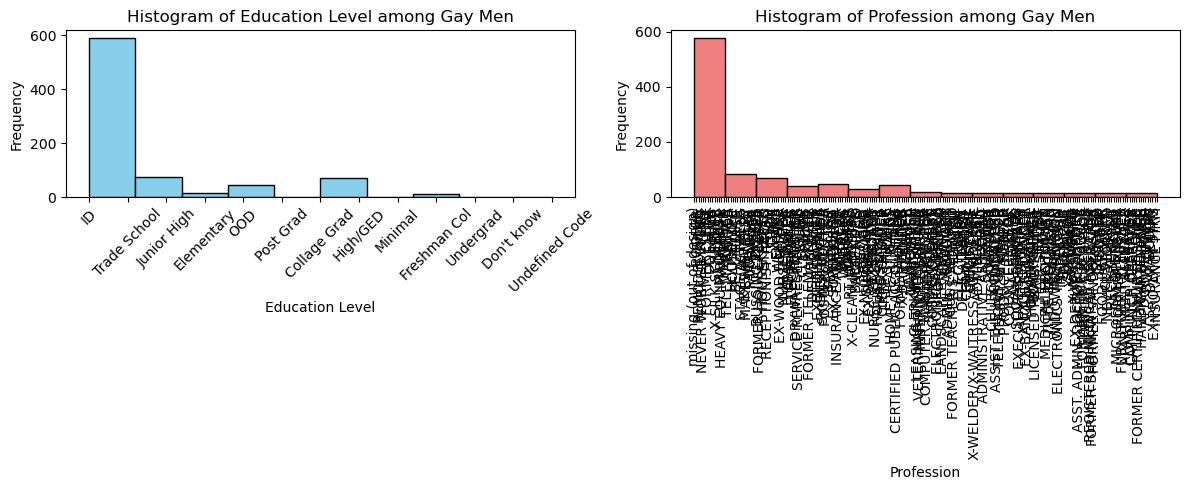

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize lists
education_data = []
profession_data = []

# Iterate over node attributes
for node_id in G.nodes:  
    node_attributes = G.nodes[node_id]  
    gay = node_attributes.get("Gay", None)  
    
    # Filter for gay individuals
    if gay == 1:
        education = node_attributes.get("Education level", None)
        profession = node_attributes.get("Profession", None)

        # Append to respective lists if values are not missing
        if education and education.strip() != " ":
            education_data.append(education)
        
        if profession and profession.strip() != " ":
            # Split professions by comma and extend the list
            split_professions = [p.strip() for p in profession.split(",")]
            profession_data.extend(split_professions)

# Convert to DataFrames
df_education = pd.DataFrame(education_data, columns=['Education Level'])
df_profession = pd.DataFrame(profession_data, columns=['Profession'])

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for Education Level
plt.subplot(1, 2, 1)
plt.hist(df_education['Education Level'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Education Level among Gay Men')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Histogram for Profession
plt.subplot(1, 2, 2)
plt.hist(df_profession['Profession'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Histogram of Profession among Gay Men')
plt.xlabel('Profession')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Collected Professions: ['missing (out of design)', 'ROOFER', 'REMODEL-HOME', 'EX-MAID', 'NEVER WORKED IN LIFE', 'PRO', 'FORMER CLERK', 'PRO', 'DDEALER', 'PRO', 'FORMER CLERK', 'PRO', 'PIMP', 'DDEALER', 'THIEF', 'CONSTRUCTION', 'LABORER', 'PIMP', 'DDEALER', 'DDEALER', 'STREETS', 'BONDSMAN', 'BONDSMAN', 'INSURANCE SALESMAN', 'missing (out of design)', 'missing (out of design)', 'missing (out of design)', 'missing (out of design)', 'UNEMP', 'PRO', 'X-SILK SCREENER', 'MACHINIST', 'HEAVY EQUIP OPERATR', 'CHILD CARE', 'FOOD SERVICE', 'MEAT CUTTER', 'STOCKER', 'LABORER', 'MANAGER', 'OFFICE', 'DIS/SSI', 'BAG ATTENDANT', 'WAITRESS', 'QUALITY CONTROL INSPECTOR', 'RETIRED', 'OWNER', 'CHILD', 'MECHANIC', 'AUTO', 'UNK', 'CONSTRUCTION', 'CHILD', 'TELEMARKETER', 'STYRO MOLDER', 'OPERATOR', 'STUDENT', 'HOUSE PAINTER', 'BRICK LAYER', 'MAKES MEDICAL SCREWS', 'COAL MINER', 'EX(?)-PIMP', 'HAULING', 'missing (out of design)', 'RETIRED', 'MAINTENANCE', 'missing (out of design)', 'missing (out of design)', '

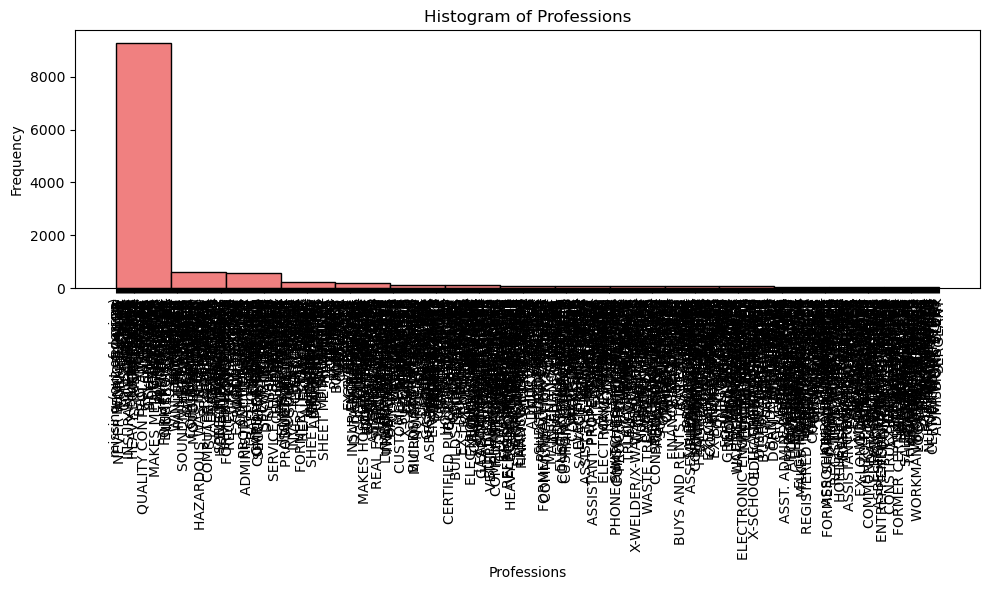

In [135]:
# Initialize an empty list for professions
profession_list = []

# Iterate over all nodes in the graph
for node_id in G.nodes:  
    node_attributes = G.nodes[node_id]  # Get node attributes
    profession = node_attributes.get("Profession", None)  # Get "Profession"

    # Check if the profession attribute exists and is not empty
    if profession and profession.strip() != " ":
        # Split the profession string by commas and add each profession individually
        split_professions = [p.strip() for p in profession.split(",")]
        profession_list.extend(split_professions)  # Add to the list

# Check the first few professions in the list
print("Collected Professions:", profession_list[:100])

# Plot the histogram of professions
plt.figure(figsize=(10, 6))
plt.hist(profession_list, bins=15, color='lightcoral', edgecolor='black')

# Customize the plot
plt.title('Histogram of Professions')
plt.xlabel('Professions')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()



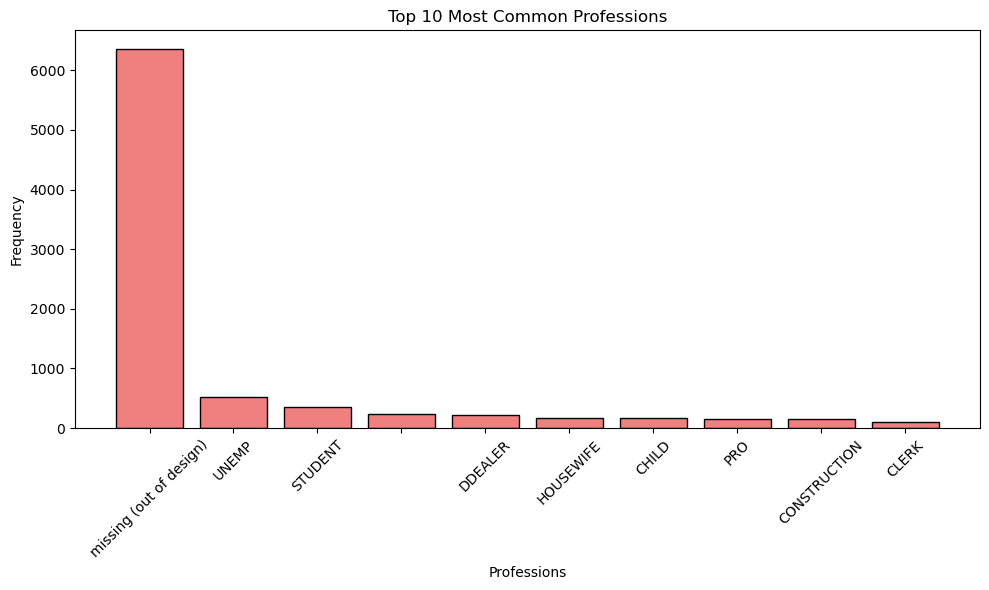

In [137]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each profession
profession_counts = Counter(profession_list)

# Get the 10 most common professions
top_10_professions = profession_counts.most_common(10)

# Separate the professions and their counts for plotting
professions, counts = zip(*top_10_professions)

# Plot the bar chart for the top 10 professions
plt.figure(figsize=(10, 6))
plt.bar(professions, counts, color='lightcoral', edgecolor='black')

# Customize the plot
plt.title('Top 10 Most Common Professions')
plt.xlabel('Professions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


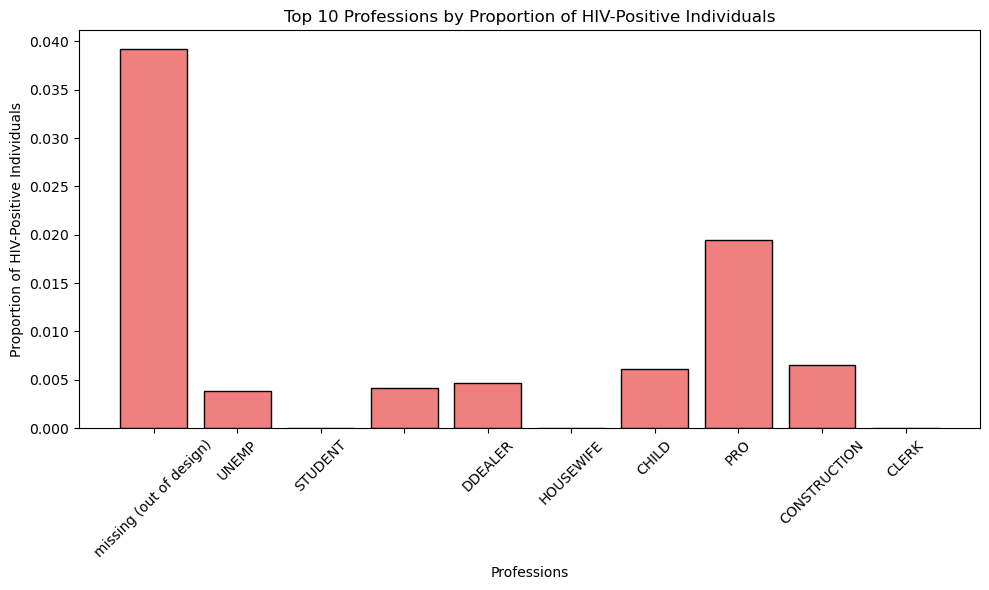

In [143]:
import matplotlib.pyplot as plt
from collections import Counter

# Initialize lists for professions and HIV status
profession_list = []
hiv_status_list = []

# Iterate over all nodes in the graph
for node_id in G.nodes:
    node_attributes = G.nodes[node_id]

    profession = node_attributes.get("Profession", None)  # Get "Profession"
    hiv_status = node_attributes.get("HIV_status", None)  # Get "HIV_status"
    
    # Check if the profession attribute exists and is not empty
    if profession and profession.strip() != " ":
        # Split the profession string by commas and add each profession individually
        split_professions = [p.strip() for p in profession.split(",")]
        profession_list.extend(split_professions)  # Add to the list
        
        # Store HIV status for the corresponding profession
        hiv_status_list.extend([hiv_status] * len(split_professions))

# Count the frequency of each profession and HIV status
profession_counts = Counter(profession_list)
hiv_counts_by_profession = {}

# Calculate HIV-positive count by profession
for profession in profession_counts:
    # Count how many HIV-positive individuals there are in this profession
    hiv_positive_count = sum(1 for i, p in enumerate(profession_list) if p == profession and hiv_status_list[i] == 'Positive')
    hiv_counts_by_profession[profession] = hiv_positive_count / profession_counts[profession]  # Proportion of HIV-positive

# Get the 10 most common professions
top_10_professions = profession_counts.most_common(10)

# Separate the professions and their HIV-positive proportions for plotting
professions, _ = zip(*top_10_professions)
hiv_proportions = [hiv_counts_by_profession[profession] for profession in professions]

# Plot the bar chart for the top 10 professions by HIV proportion
plt.figure(figsize=(10, 6))
plt.bar(professions, hiv_proportions, color='lightcoral', edgecolor='black')

# Customize the plot
plt.title('Top 10 Professions by Proportion of HIV-Positive Individuals')
plt.xlabel('Professions')
plt.ylabel('Proportion of HIV-Positive Individuals')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


In [150]:
# Initialize the list to store node IDs with "PRO" in their profession
GAY_PROS = []

# Iterate over all nodes in the graph
for node_id in G.nodes:
    node_attributes = G.nodes[node_id]
    gaybool=node_attributes.get("Gay", None) 
    if gaybool==1:
        profession = node_attributes.get("Profession", None)  # Get "Profession"
        
        # Check if the profession attribute exists and contains "PRO"
        if profession and "PRO" in profession.upper():  # Case insensitive check for "PRO"
            GAY_PROS.append(node_id)  # Add the node ID to the list

# Print the list of node IDs with "PRO" in their profession
print("Nodes with 'PRO' in their profession:", GAY_PROS)

print(len(GAY_PROS))


Nodes with 'PRO' in their profession: ['266', '283', '337', '618', '2', '77', '262', '10', '493', '259', '261', '765', '258', '290', '175', '26', '25', '275', '564', '694', '720', '728', '2004', '389', '379', '2454', '523', '2189', '860', '938', '86', '767', '557', '2107', '1798', '640', '3645', '3647', '5463', '388', '144', '13307', '4159', '4160', '764', '871', '486', '846', '237', '169', '248', '193', '495', '2386', '238', '4283', '12384', '552', '442', '12284', '448', '452', '457', '5722', '467', '488', '4580', '4581', '12518', '12521', '5292', '4309', '496', '506', '542', '794', '5645', '577', '3930', '582', '2371', '937', '711', '717', '762', '950', '866', '955', '4240', '4298', '4247', '4311', '4804', '4262', '4287', '4288', '4299']
97


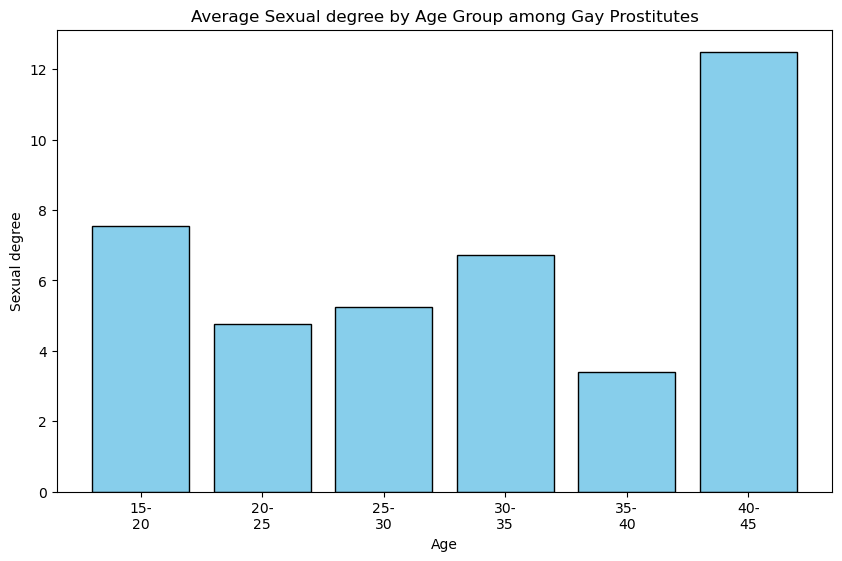

In [151]:
k = []
for node_id in GAY_PROS:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    if gay== 1:
        age=node_attributes.get("Age", None)
        if age !=" ":
            degree=G.degree(node_id)
            k.append([age,degree])  # Append the "Race" value to the list

# Convert to DataFrame
import matplotlib.pyplot as plt
# Convert to DataFrame
df = pd.DataFrame(k, columns=['Age', 'Value'])

# Ensure 'Age' is treated as numeric (even if initially it's a string)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check if the 'Value' column is numeric and coerce if necessary
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Now group by 'Age' and calculate the average of 'Value'
# Define the age intervals
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-\n5', '5-\n10', '10-\n15', '15-\n20', '20-\n25', '25-\n30', '30-\n35', '35-\n40', '40-\n45', '45-\n50', 
          '50-\n55', '55-\n60', '60-\n65', '65-\n70', '70-\n75', '75-\n80', '80-\n85', '85-\n90', '90-\n95', '95-\n100']

# Create a new column with the corresponding age group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average 'Value' for each age group
avg_per_age_group = df.groupby('Age_Group')['Value'].mean()


plt.figure(figsize=(10, 6))
plt.bar(avg_per_age_group.index, avg_per_age_group.values, color='skyblue', edgecolor='black')
# Add title and labels
plt.title('Average Sexual degree by Age Group among Gay Prostitutes')
plt.xlabel('Age')
plt.ylabel('Sexual degree')

# Show the plot
plt.show()